First, import the packages we will need.

In [1]:
from asymmetric_uncertainty import a_u
import numpy as np, matplotlib.pyplot as plt
from astropy import units as u
import logging

logging.basicConfig(level=logging.DEBUG)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

We initialize our values by instantiating the `a_u` class:

In [2]:
A = a_u(3.,.2,.3)
print(isinstance(A, u.Quantity))
A

DEBUG:Asymmetric Uncertainty:Initializing with nominal=3.0, pos_err=0.2, neg_err=0.3, unit=


True


<3.0 (+0.2, -0.3)>

In [3]:
B = a_u(2.5,0.2,0.2)
B

DEBUG:Asymmetric Uncertainty:Initializing with nominal=2.5, pos_err=0.2, neg_err=0.2, unit=


<2.5 ± 0.2>

We can now perform arithmetic operations, and the errors will propagate appropriately:

In [4]:
A+B

DEBUG:Asymmetric Uncertainty:Initializing with nominal=2.5, pos_err=0.2, neg_err=0.2, unit=
DEBUG:Asymmetric Uncertainty:Initializing with nominal=5.5, pos_err=0.28284271247461906, neg_err=0.36055512754639896, unit=
DEBUG:Asymmetric Uncertainty:added <3.0 (+0.2, -0.3)> + <2.5 ± 0.2> = <5.5 (+0.28284271247461906, -0.36055512754639896)>
DEBUG:Asymmetric Uncertainty:Initializing with nominal=5.5, pos_err=0.28284271247461906, neg_err=0.36055512754639896, unit=


<5.5 (+0.28284271247461906, -0.36055512754639896)>

In [5]:
A-B

DEBUG:Asymmetric Uncertainty:Initializing with nominal=0.5, pos_err=0.28284271247461906, neg_err=0.36055512754639896, unit=
DEBUG:Asymmetric Uncertainty:subtracted <2.5 ± 0.2> from <3.0 (+0.2, -0.3)> = <0.5 (+0.28284271247461906, -0.36055512754639896)>
DEBUG:Asymmetric Uncertainty:Initializing with nominal=0.5, pos_err=0.28284271247461906, neg_err=0.36055512754639896, unit=


<0.5 (+0.28284271247461906, -0.36055512754639896)>

In [6]:
A*B

DEBUG:Asymmetric Uncertainty:Initializing with nominal=7.5, pos_err=0.7810249675906654, neg_err=0.9604686356149273, unit=


<7.5 (+0.7810249675906654, -0.9604686356149273)>

In [7]:
A/B

DEBUG:Asymmetric Uncertainty:Initializing with nominal=1.2, pos_err=0.12496399481450646, neg_err=0.15367498169838836, unit=


<1.2 (+0.12496399481450646, -0.15367498169838836)>

In [8]:
A**B

DEBUG:Asymmetric Uncertainty:Initializing with nominal=15.588457268119896, pos_err=4.299016620007221, neg_err=5.188356570157674, unit=
DEBUG:Asymmetric Uncertainty:raised <3.0 (+0.2, -0.3)> to <2.5 ± 0.2> = <15.588457268119896 (+4.299016620007221, -5.188356570157674)>
DEBUG:Asymmetric Uncertainty:Initializing with nominal=15.588457268119896, pos_err=4.299016620007221, neg_err=5.188356570157674, unit=


<15.588457268119896 (+4.299016620007221, -5.188356570157674)>

They even work with `numpy` functions (i.e., `ufunc`s)!

In [9]:
np.sin(A)

DEBUG:Asymmetric Uncertainty:Initializing with nominal=0.1411200080598672, pos_err=-0.1979984993200891, neg_err=-0.2969977489801336, unit=


<0.1411200080598672 (+0.1979984993200891, -0.2969977489801336)>

In [10]:
np.exp(A)

DEBUG:Asymmetric Uncertainty:Initializing with nominal=2.718281828459045, pos_err=0, neg_err=0, unit=
DEBUG:Asymmetric Uncertainty:Initializing with nominal=20.085536923187664, pos_err=4.017107384637533, neg_err=6.0256610769562995, unit=
DEBUG:Asymmetric Uncertainty:raised <2.718281828459045 ± 0.0> to <3.0 (+0.2, -0.3)> = <20.085536923187664 (+4.017107384637533, -6.0256610769562995)>
DEBUG:Asymmetric Uncertainty:Initializing with nominal=20.085536923187664, pos_err=4.017107384637533, neg_err=6.0256610769562995, unit=


<20.085536923187664 (+4.017107384637533, -6.0256610769562995)>

`a_u` objects have a `.pdf()` method that evaluates the corresponding probability density at a given input. We can use this to conveniently plot the PDFs of the numbers themselves.

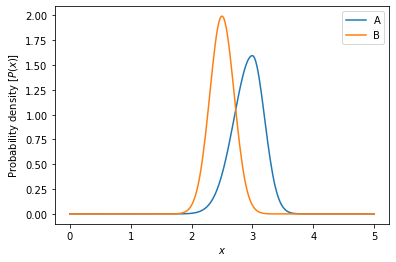

In [11]:
x = np.linspace(0,5,250)

plt.plot(x,A.pdf(x),label="A")
plt.plot(x,B.pdf(x),label="B")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("Probability density [$P(x)$]")
plt.show()

Similarly, there is a `.cdf()` method as well.

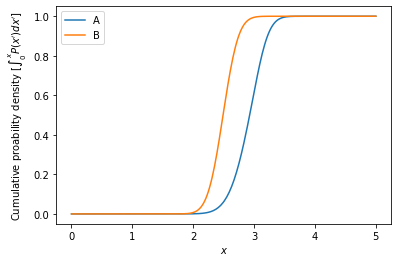

In [12]:
plt.plot(x,A.cdf(x),label="A")
plt.plot(x,B.cdf(x),label="B")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("Cumulative proability density [$\int_0^x P(x') dx'$]")
plt.show()

In [13]:
C1 = a_u([3, 2.5], [0.2, 0.2], [0.3,0.2])
C2 = a_u([A, B])
np.isclose(C1, C2)

DEBUG:Asymmetric Uncertainty:Initializing with nominal=[3, 2.5], pos_err=[0.2, 0.2], neg_err=[0.3, 0.2], unit=
DEBUG:Asymmetric Uncertainty:Initializing with nominal=[3.0, 2.5], pos_err=[0.2, 0.2], neg_err=[0.3, 0.2], unit=


array([ True,  True])

In [14]:
for foo in C2:
    print(foo)

DEBUG:Asymmetric Uncertainty:Initializing with nominal=3.0, pos_err=0.2, neg_err=0.3, unit=
DEBUG:Asymmetric Uncertainty:Initializing with nominal=2.5, pos_err=0.2, neg_err=0.2, unit=


<3.0 (+0.2, -0.3)>
<2.5 ± 0.2>


We can compare them logically. Of course, $3.0>2.5$:

In [15]:
A>B

True

But we also have the ability to use `>>` and `<<` as "significantly greater than" and "significantly less than". The errors overlap (i.e. $3.0-0.4\ngtr2.5+0.3$), so the following is false.

In [16]:
A>>B

False